# Inicialización y no-linearidad
Objetivo: Conocer los diferentes inicializadores, funciones de costo y  activación. 

- La inicialización de pesos tiene efecto en el tiempo de entrenamiento
- Las funciones de costo dependen de el número de clases o si es clasificación o regresión
- Las funciones no lineales tienen diferentes comportamientos en los tipos de redes, estas proyectan los datos a un diferente espacio

## Leer conjunto de datos


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
K.clear_session()

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X_data = data.data
y_data = data.target

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33, random_state = 2) 

In [2]:
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape) 
print(y_test.shape) 

(381, 30)
(381,)
(188, 30)
(188,)


- Se modifica la forma de los datos de 2-d (n, 28, 28) a 1-d (n, 784)

## Modelo MLP simple, se aplica optimizador 'rmsprp'
- En el ejemplo anterior 'SGD' tiene un desempeño bajo

In [3]:
epoch = 50
verbose = 0
batch = 50

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Funcion costo
- Se mide que tan lejos esta $\hat{y_i}$ de $y_i$
$$MSE = \frac{1}{n} \sum^n(y_i - \hat{y}_i)^2 $$

- Para más de 2 clases se usa 'sparse_categorical_crossentropy' 
- Para más de 2 clases con 'one hot' se aplica 'categorical_crossentropy'
- Para 2 clases 'binary_crossentropy'

In [5]:
def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_shape = (30, ), activation = 'sigmoid'))     
    model.add(Dense(1, activation = 'sigmoid'))                       

    model.compile(optimizer='rmsprop', loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model




In [6]:
model = make_model()

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)

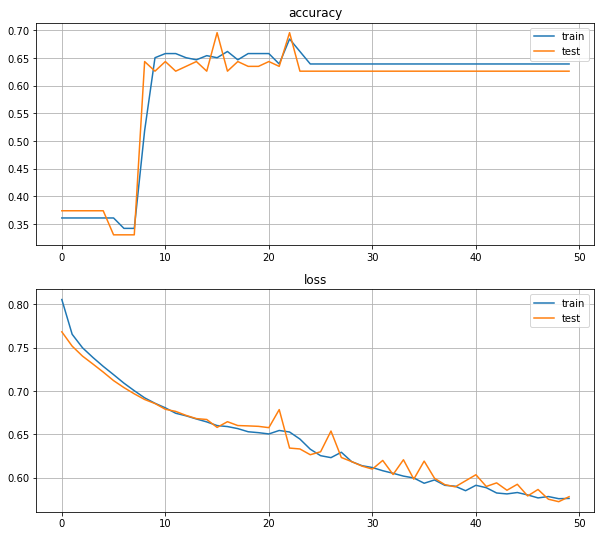

In [8]:
#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

In [9]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

188/1 - 0s - loss: 0.5833 - accuracy: 0.6117

Test acccuracy: 0.61170214


## No-linearidad (Función de activación)
- Las funciones no-lineales son necesarias en los perceptrones multicapa, estas mapean las salidas de las multiplicaciones por las matrices a un espacio no lineal en donde los datos pueden ser clasificados.
- Existen muchas funciones de activación como:
    - Relu $\text{max}(0,1)$ que trabaja bien con imágenes y muestra una rápida convergencia que las demás funciones 
    - Tanh $\text{tanh}(x)$ que tiene una salida de un rango de -1 a 1, a diferencia de la sigmoide 

- Investigar el probelma del gradiente y el efecto de las funciones de activación

## tanh

In [10]:
def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_shape = (30, ), activation = 'tanh'))         
    model.add(Dense(1, activation = 'sigmoid'))                             

    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model



In [11]:
model = make_model()

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


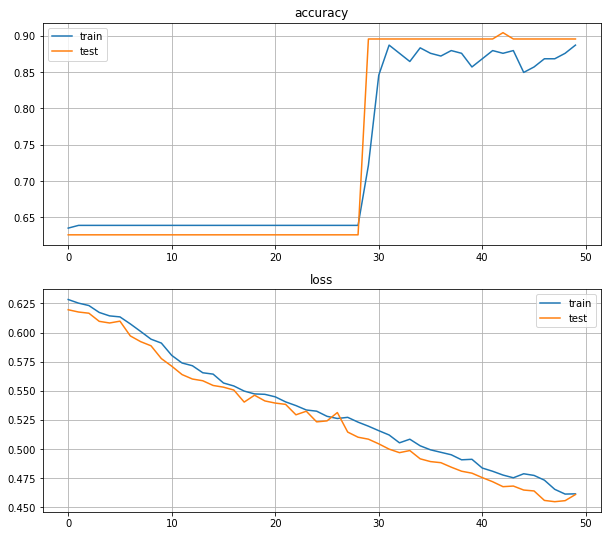

In [13]:

#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

188/1 - 0s - loss: 0.4765 - accuracy: 0.8777

Test accuracy: 0.87765956


## relu

In [15]:
def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_shape = (30, ), activation = 'relu'))       
    model.add(Dense(1, activation = 'sigmoid'))                            

    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model



In [16]:
model = make_model()

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


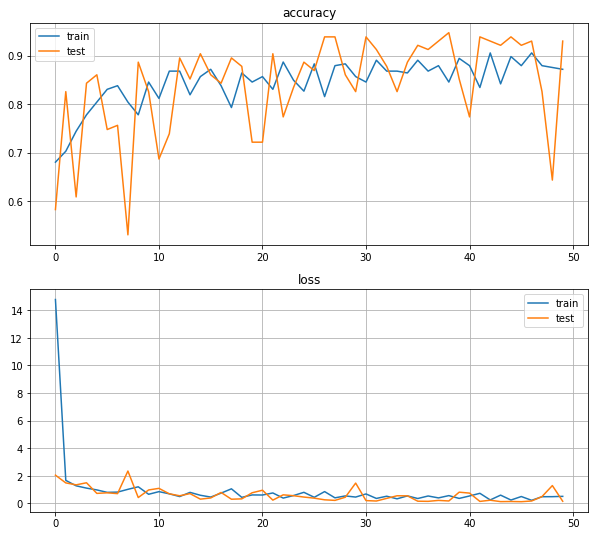

In [18]:

#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

188/1 - 0s - loss: 0.2331 - accuracy: 0.8989

Test accuracy: 0.89893615


## Inicialización de pesos
## he_normal 
- he_normal muestrea de una distribución normal centrada con stddev = sqrt(2 /fan_in) donde fan_in es el número de entradas en el tensor de pesos.



In [20]:
def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_shape = (30, ), activation = 'tanh', kernel_initializer='he_normal'))  # he_normal   
    model.add(Dense(1, activation = 'sigmoid'))                        

    model.compile(optimizer='rmsprop', loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model




In [21]:
model = make_model()

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


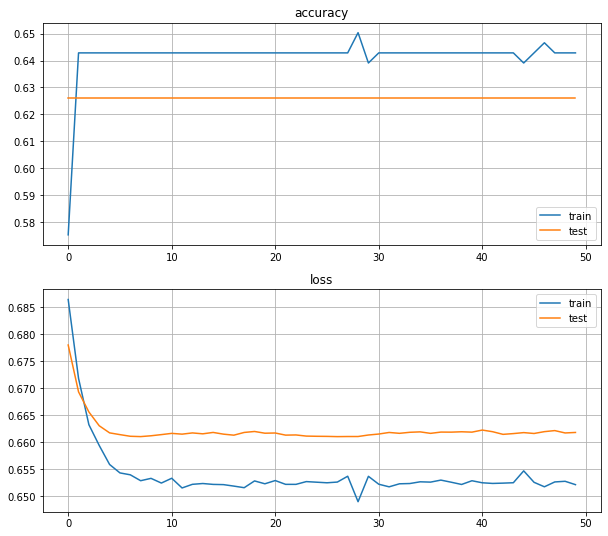

In [23]:

#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

188/1 - 0s - loss: 0.6600 - accuracy: 0.6170

Test accuracy: 0.61702126


## orthogonal

In [25]:
def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_shape = (30, ), activation = 'tanh', kernel_initializer='orthogonal'))  # orthogonal       
    model.add(Dense(1, activation = 'sigmoid'))                            

    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model



In [26]:
model = make_model()

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


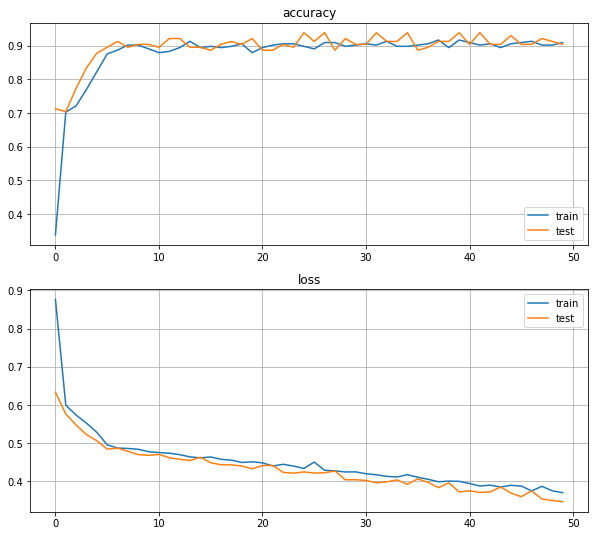

In [28]:

#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

In [29]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

188/1 - 0s - loss: 0.3409 - accuracy: 0.9255

Test accuracy: 0.9255319


- La red a mejorado el desempeño
- Probar con diferentes capas y funciones de activación 
- Mejorar el tiempo de entrenamiento de la red y 'Test accuracy'